In [5]:
pip install -U imbalanced-learn

  Using cached imbalanced_learn-0.9.0-py3-none-any.whl (199 kB)
  Using cached scikit_learn-1.0.2-cp38-cp38-win_amd64.whl (7.2 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 0.24.1
    Uninstalling scikit-learn-0.24.1:
Note: you may need to restart the kernel to use updated packages.


ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.24.1.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



In [195]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [196]:
df=pd.read_csv(r'C:\Users\Admin\Desktop\WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [197]:
df.shape

(1470, 35)

In [198]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [199]:
df.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [200]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [201]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [202]:
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [203]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

In [204]:
df.drop(['EmployeeCount','Over18','StandardHours','EmployeeNumber'],axis=1,inplace=True)

unnecessary columns is removed as EmployeeCount, Over18 and StandardHours as single unique value and employpee number is specfic for particular person

In [92]:
df.value_counts('Attrition') #total number of counts under Attrition

Attrition
No     1233
Yes     237
dtype: int64

<AxesSubplot:xlabel='Attrition', ylabel='count'>

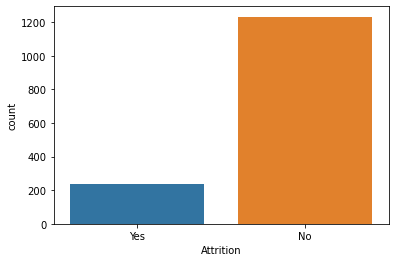

In [205]:
sns.countplot(x='Attrition', data=df)

In [206]:
# Separating categorical dataset columns
obj_type=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        obj_type.append(i)
obj_type

['Attrition',
 'BusinessTravel',
 'Department',
 'EducationField',
 'Gender',
 'JobRole',
 'MaritalStatus',
 'OverTime']

In [209]:
# Separting Numeric Columns
int_type=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='int64':
        int_type.append(i)
int_type

['Age',
 'DailyRate',
 'DistanceFromHome',
 'Education',
 'EnvironmentSatisfaction',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobSatisfaction',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

<AxesSubplot:xlabel='Gender', ylabel='count'>

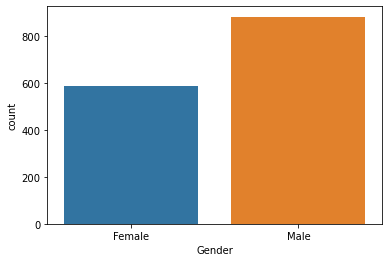

In [210]:
sns.countplot(x='Gender',data=df)

<AxesSubplot:xlabel='Age', ylabel='count'>

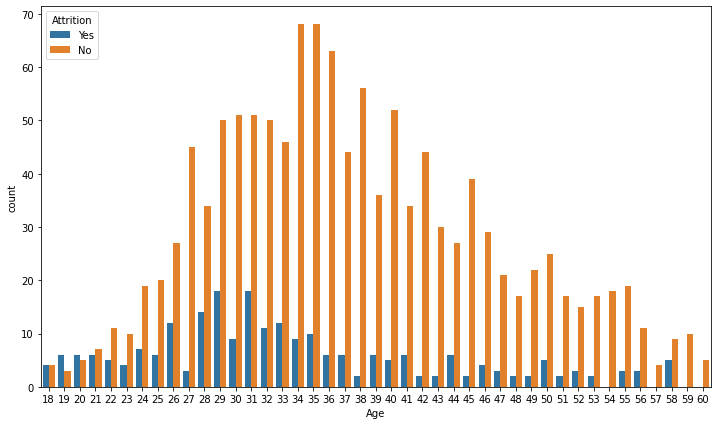

In [211]:
plt.figure(figsize=(12,7))
sns.countplot(x='Age',data=df, hue='Attrition')

<AxesSubplot:xlabel='Gender', ylabel='count'>

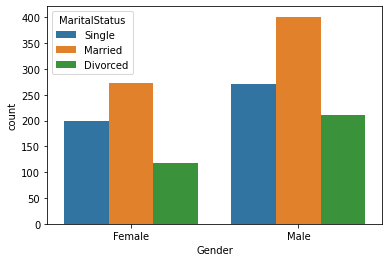

In [212]:
sns.countplot(x='Gender',hue='MaritalStatus',data=df)

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

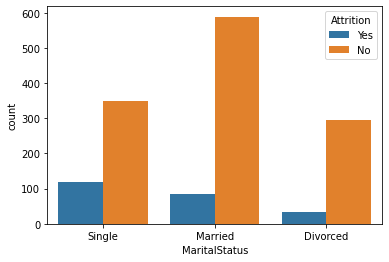

In [213]:
sns.countplot(x='MaritalStatus',data=df, hue='Attrition')

<AxesSubplot:xlabel='Department', ylabel='count'>

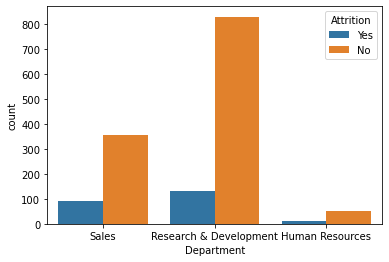

In [214]:
sns.countplot(x='Department',data=df, hue='Attrition')

<AxesSubplot:xlabel='OverTime', ylabel='count'>

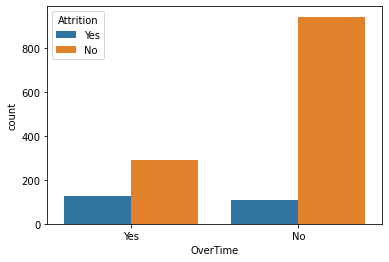

In [215]:
sns.countplot(x='OverTime',data=df, hue='Attrition')

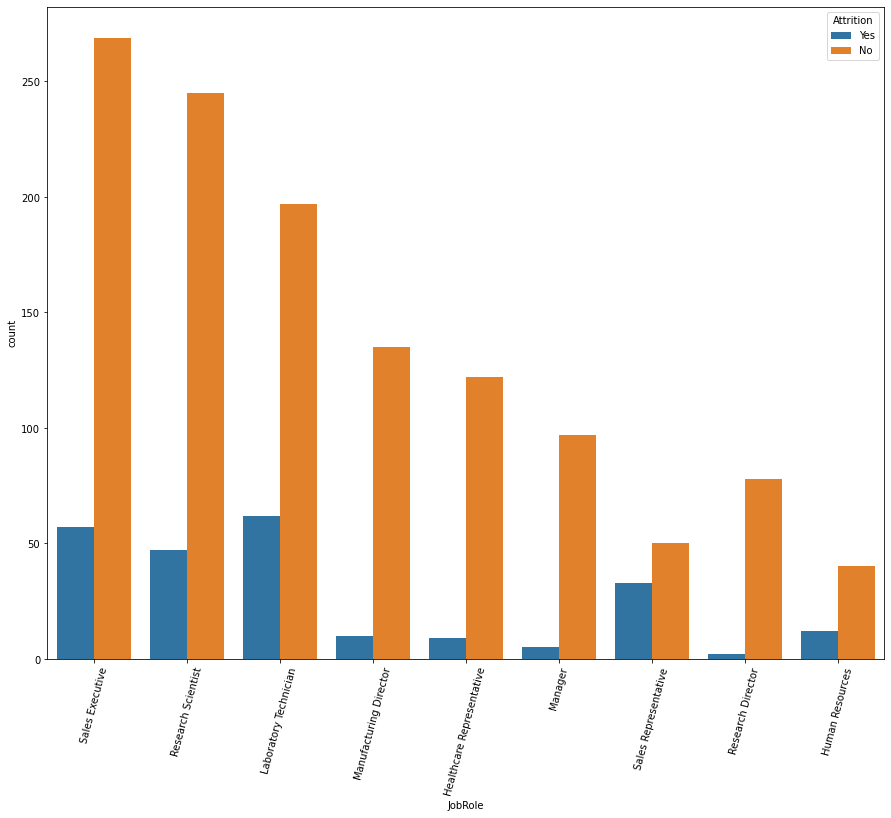

In [216]:
plt.figure(figsize=[15,12])
sns.countplot(x='JobRole',data=df, hue='Attrition')
plt.xticks(rotation=75)
plt.show()

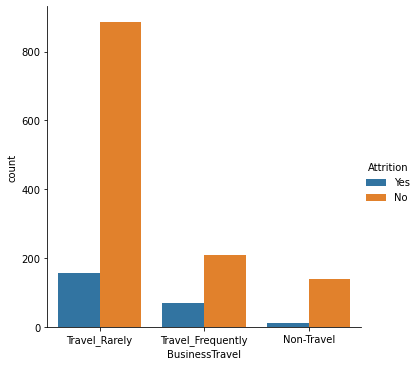

In [217]:
#Factorplot for BusinessTravel
sns.factorplot('BusinessTravel',kind ='count', data=df, hue='Attrition') 

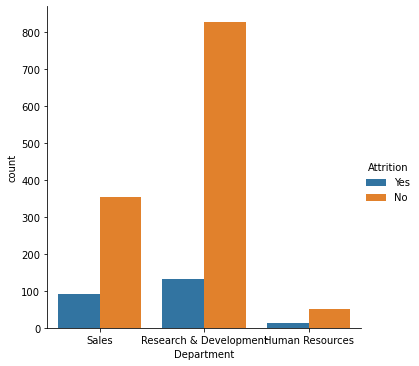

In [218]:
#Factor plot for Departments
sns.factorplot("Department",kind='count', data=df,hue="Attrition") 

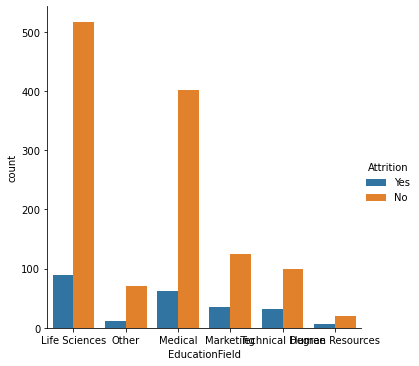

In [219]:
#Factor plot for EducationField
sns.factorplot('EducationField',kind='count',data=df,hue='Attrition') 

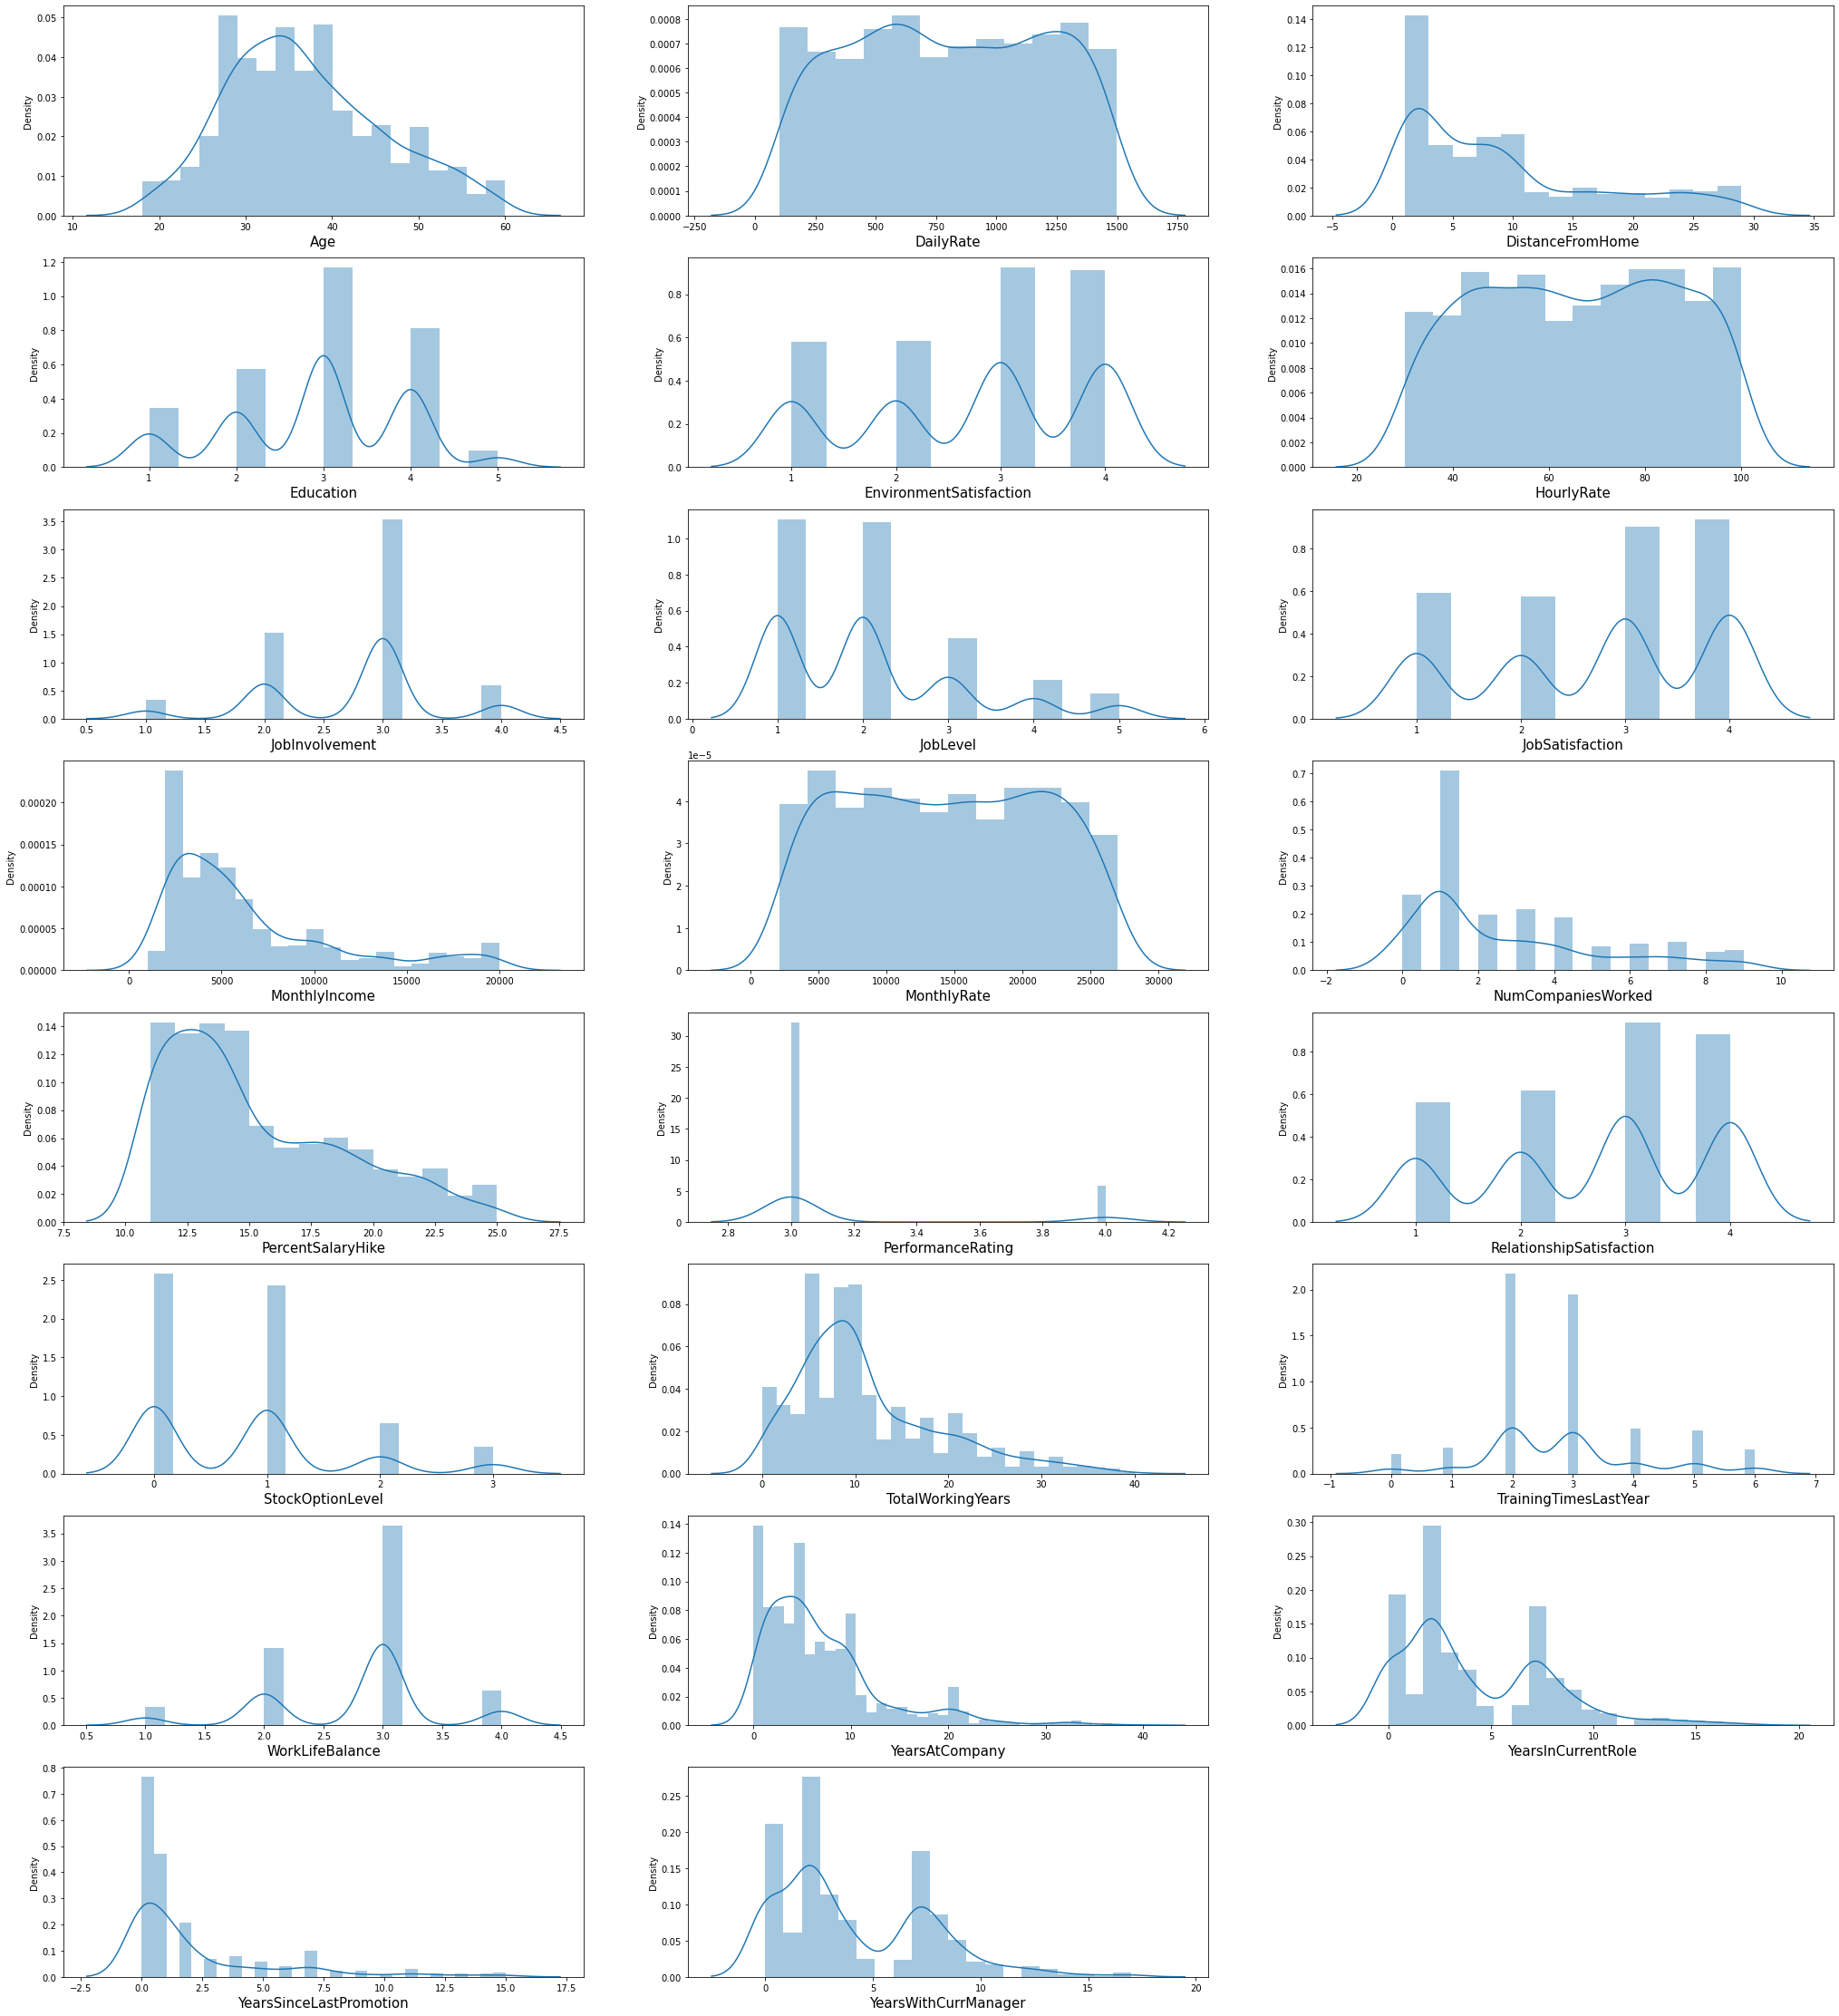

In [220]:
plt.figure(figsize=(35,40))
plotnum=1
for i in df[int_type]:
    if plotnum<=24:
        ax=plt.subplot(8,3,plotnum)
        sns.distplot(df[i])
        plt.xlabel(i,fontsize=15)
    plotnum+=1
plt.show()

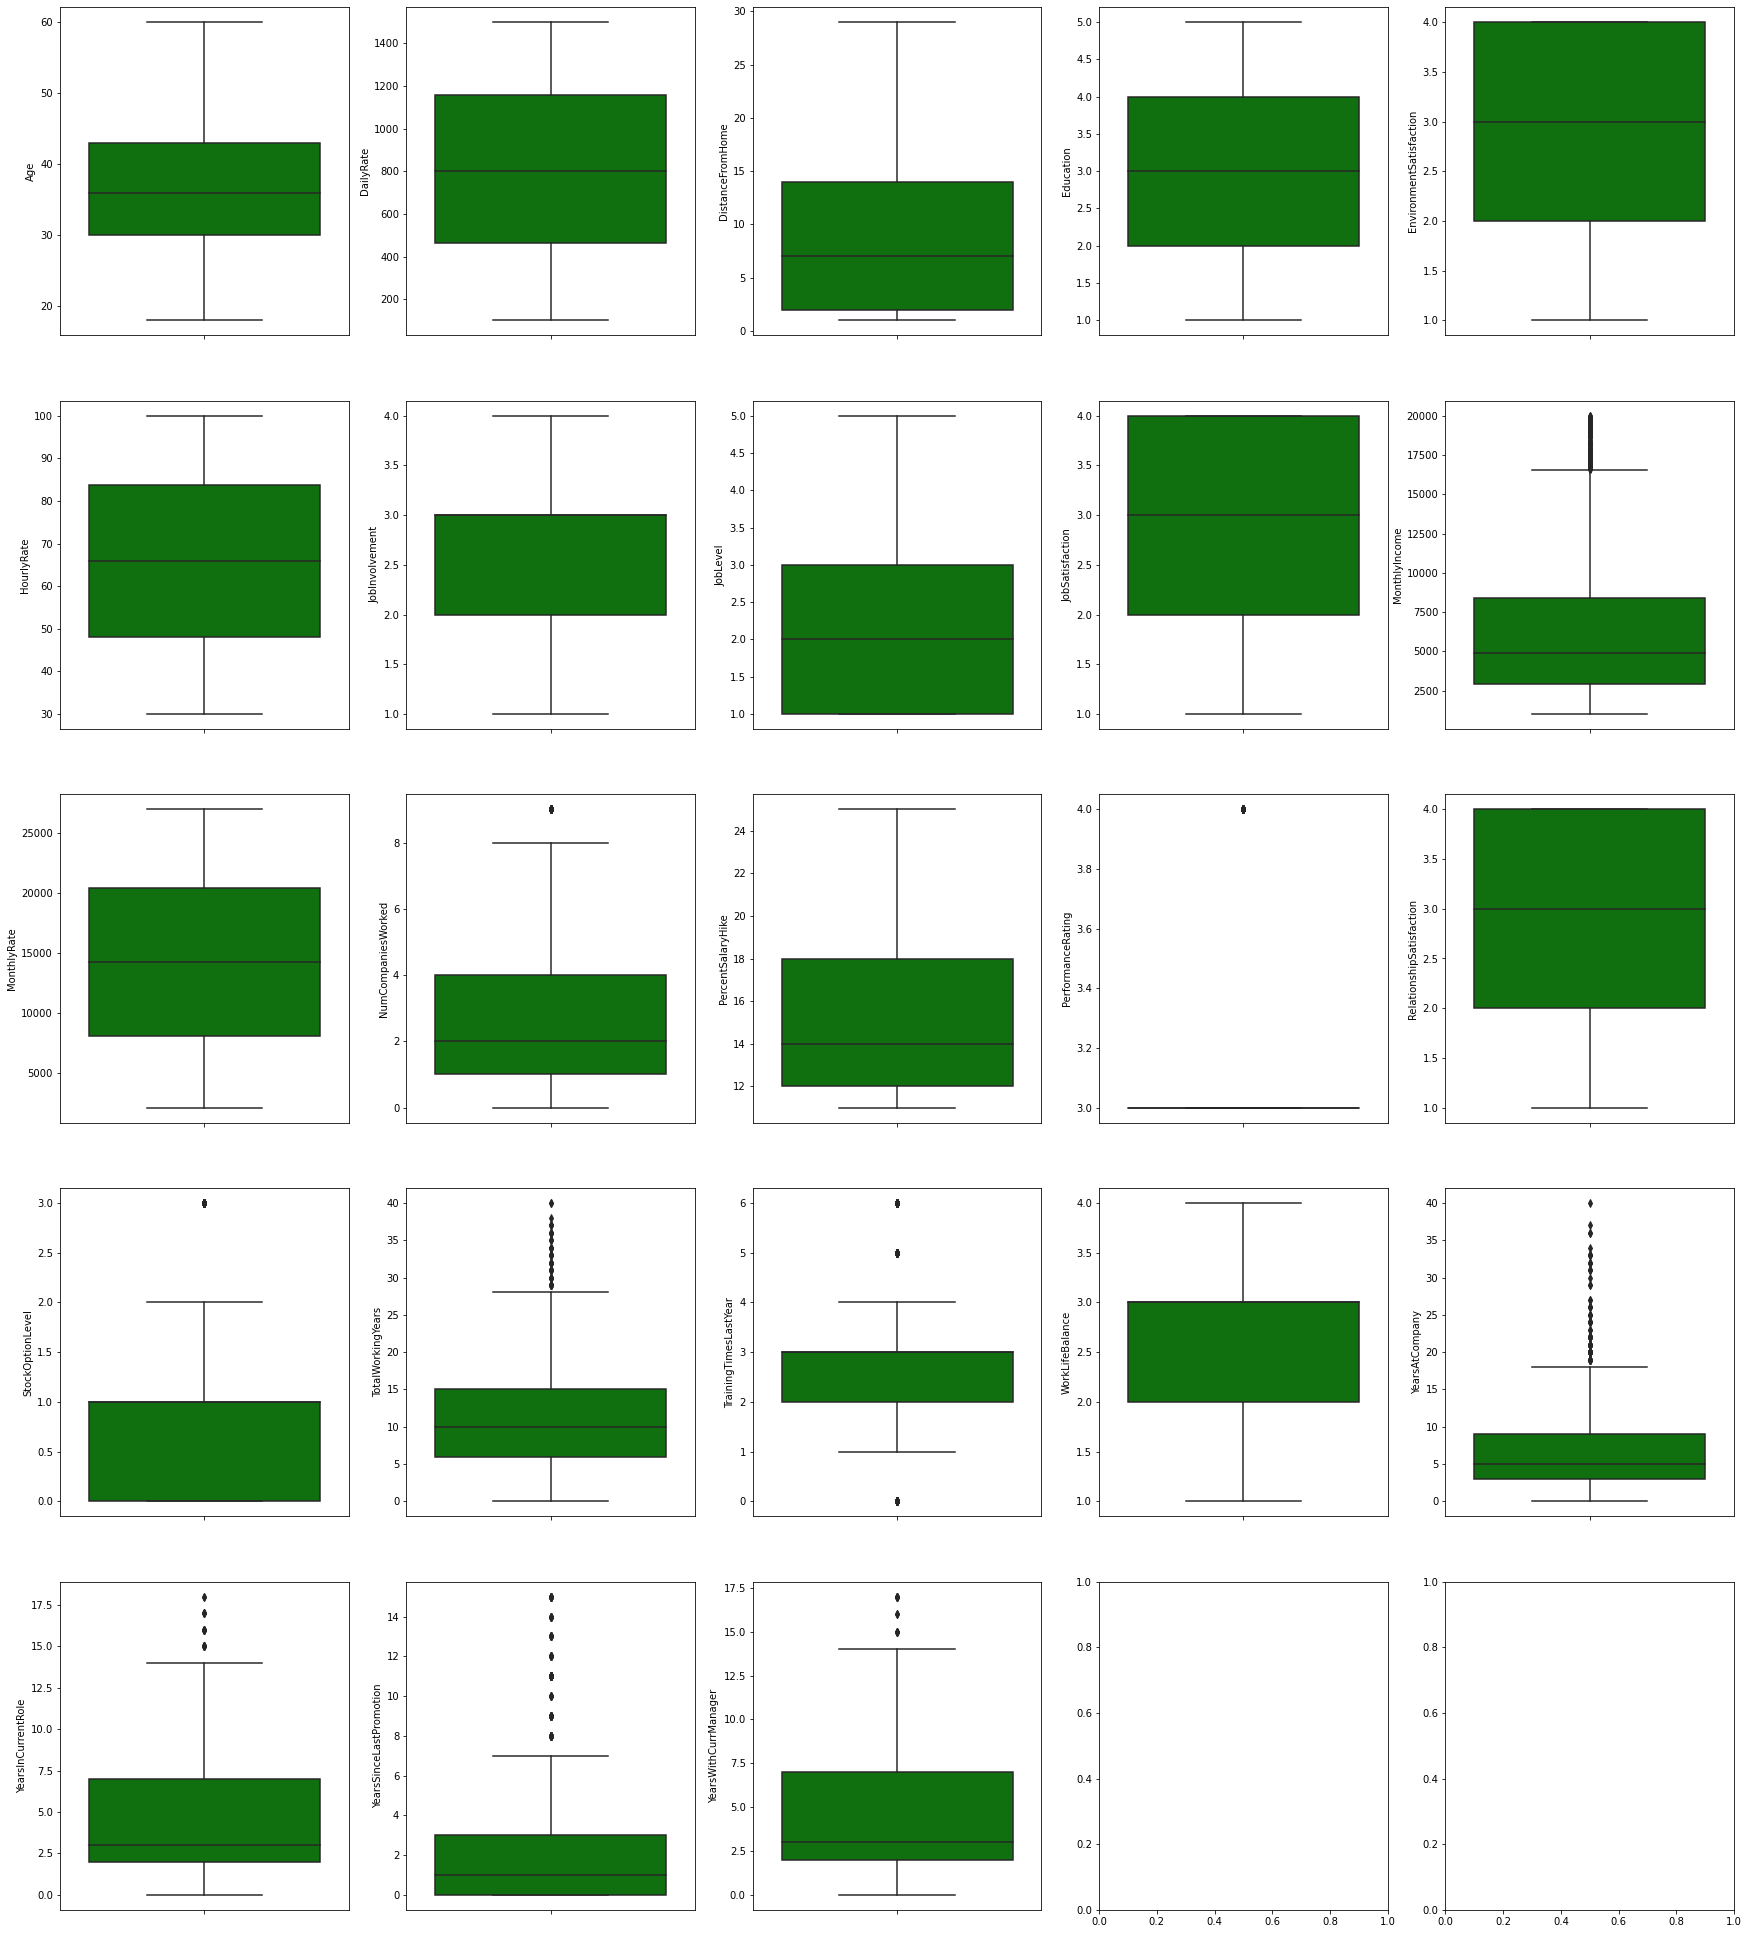

In [221]:
fig,ax=plt.subplots(ncols=5,nrows=5, figsize=(30,35))
plotnum=0
ax=ax.flatten()
for col,value in df[int_type].items():
    sns.boxplot(y=col, data=df,ax=ax[plotnum], color='g')
    plotnum+=1
plt.show()

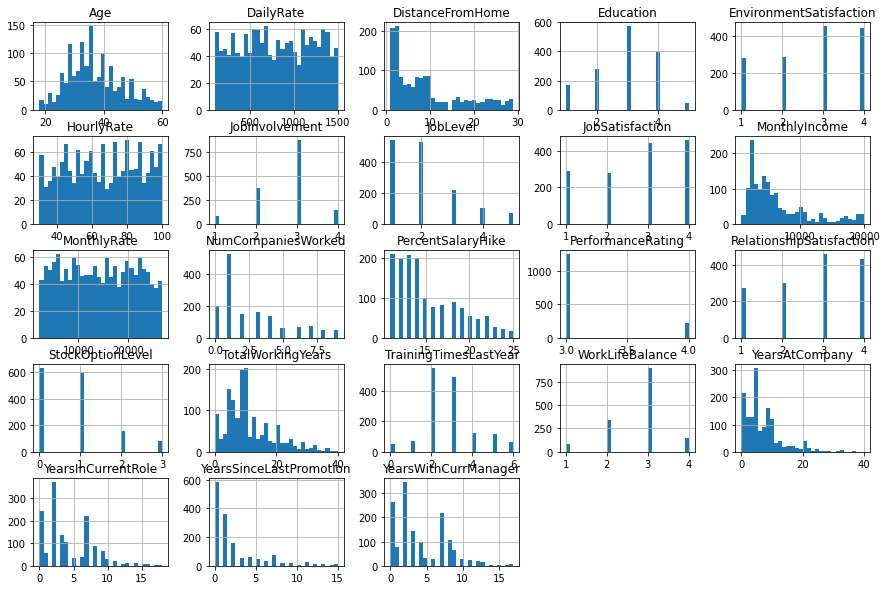

In [222]:
# Plotting the histogram for univariant analysis to check the normal distribution

df.hist(figsize=[15,10], grid=True, bins=30)
plt.show()


In [223]:
# Ordinal Encoder
from sklearn.preprocessing import OrdinalEncoder
oe =OrdinalEncoder()
df["BusinessTravel"]=oe.fit_transform(df["BusinessTravel"].values.reshape(-1,1))
df["Department"]=oe.fit_transform(df["Department"].values.reshape(-1,1))
df["EducationField"]=oe.fit_transform(df['EducationField'].values.reshape(-1,1))
df["Gender"]=oe.fit_transform(df["Gender"].values.reshape(-1,1))
df["JobRole"]=oe.fit_transform(df['JobRole'].values.reshape(-1,1))
df["MaritalStatus"]=oe.fit_transform(df["MaritalStatus"].values.reshape(-1,1))
df["OverTime"]=oe.fit_transform(df["OverTime"].values.reshape(-1,1))

In [224]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["Attrition"]=le.fit_transform(df["Attrition"])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2


In [225]:
#correlation Matrix
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,...,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,...,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,...,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,...,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,...,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


## Heatmap

In [ ]:
plt.figure(figsize=[35,32])
sns.heatmap(df.corr(),annot=True, linecolor='black',linewidth=0.5, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Zscore for outlier removal

In [227]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)
df_new=df[(z<3).all(axis=1)]
df_new.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,...,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,...,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,...,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,...,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,...,3,4,1,6,3,3,2,2,2,2


In [228]:
print(df.shape)
print(df_new.shape)

(1470, 31)
(1387, 31)


In [229]:
#percentage loss of data from datset
loss=(1470-1387)/1470*100
loss

5.646258503401361

In [230]:
df_new.skew()

Age                         0.472280
Attrition                   1.805983
BusinessTravel             -1.426774
DailyRate                  -0.017078
Department                  0.183919
DistanceFromHome            0.954752
Education                  -0.289024
EducationField              0.544868
EnvironmentSatisfaction    -0.325285
Gender                     -0.417296
HourlyRate                 -0.030481
JobInvolvement             -0.501401
JobLevel                    1.126075
JobRole                    -0.386843
JobSatisfaction            -0.345612
MaritalStatus              -0.160952
MonthlyIncome               1.544770
MonthlyRate                 0.030596
NumCompaniesWorked          1.037715
OverTime                    0.954751
PercentSalaryHike           0.800592
PerformanceRating           1.931566
RelationshipSatisfaction   -0.295686
StockOptionLevel            0.962332
TotalWorkingYears           1.034487
TrainingTimesLastYear       0.577614
WorkLifeBalance            -0.557100
Y

### Using log transform for reovinf skewness

In [231]:
for col in int_type:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])

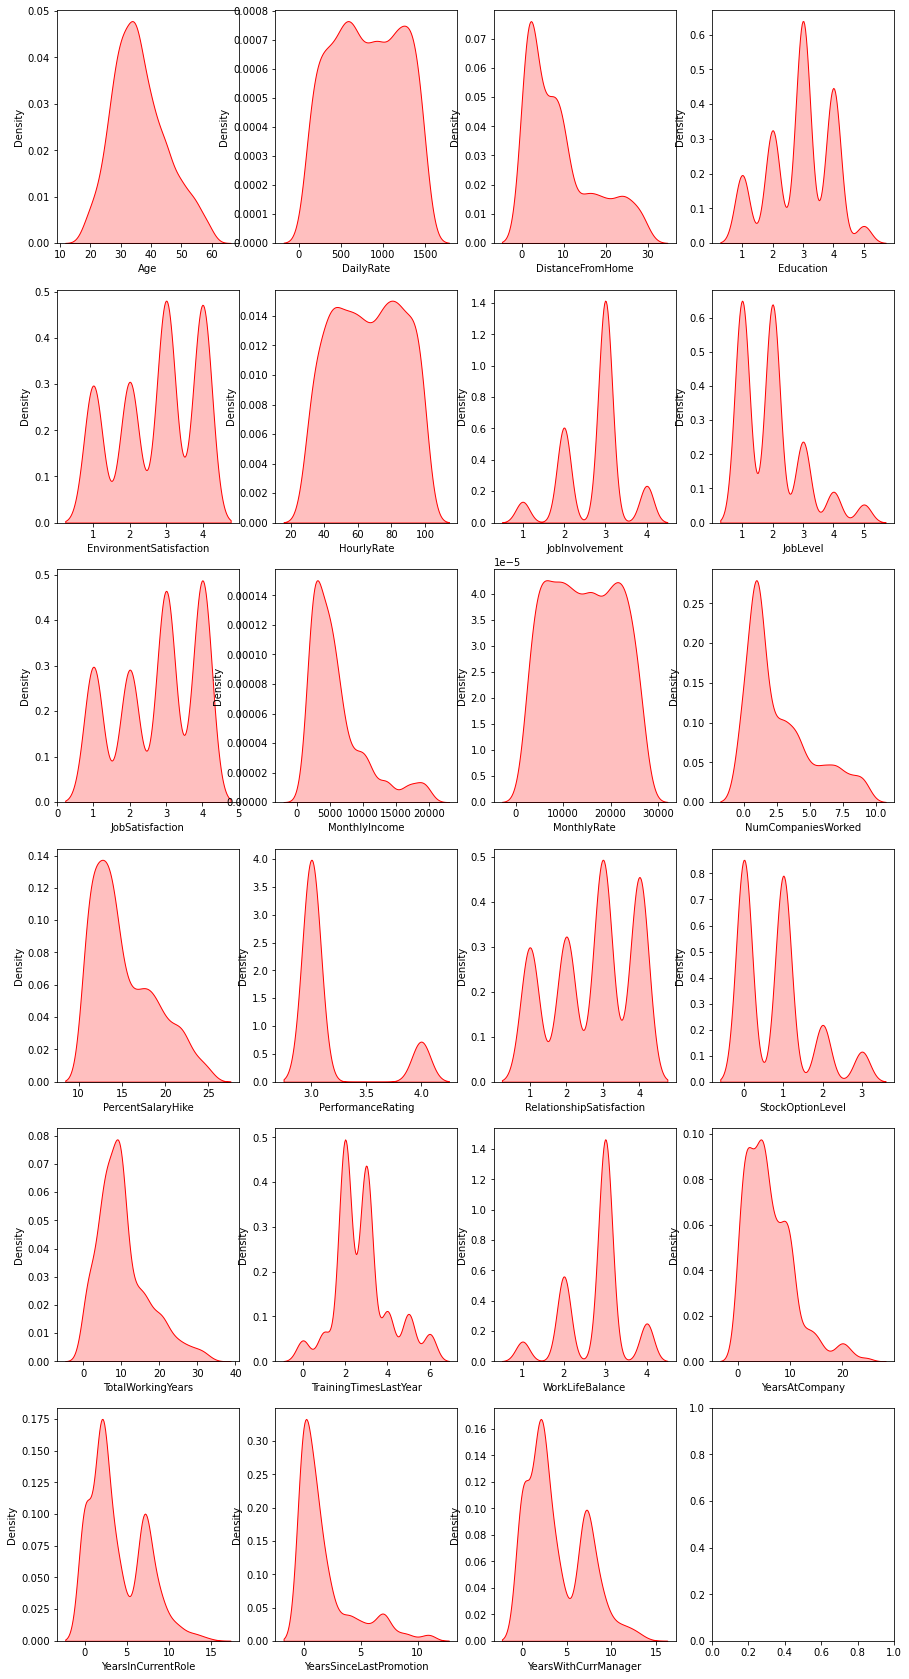

In [232]:
fig, ax = plt.subplots(ncols=4, nrows=6, figsize=(15,30))
index = 0
ax = ax.flatten()
for col, value in df_new[int_type].items():
    sns.distplot(value, ax=ax[index], hist=False, color="r", kde_kws={"shade": True})
    index += 1
plt.show()

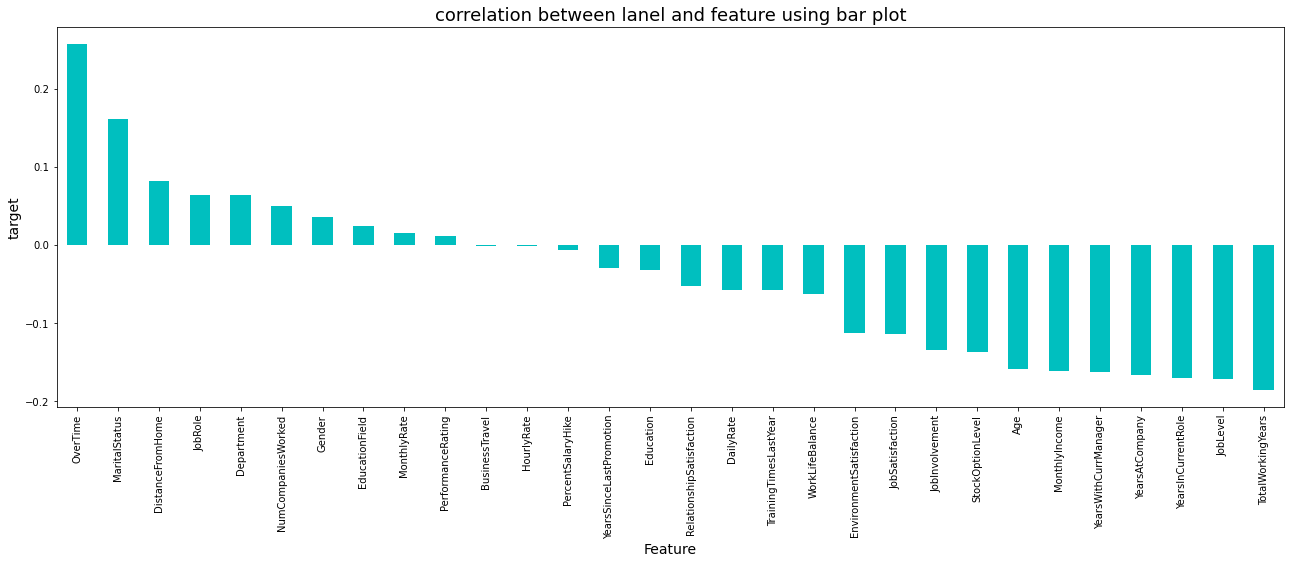

In [233]:
plt.figure(figsize=(22,7))
df_new.corr()['Attrition'].sort_values(ascending=False).drop(['Attrition']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between lanel and feature using bar plot',fontsize=18)
plt.show()

In [234]:
df_new.drop(["BusinessTravel","HourlyRate"],axis=1, inplace=True)

In [235]:
x= df_new.drop('Attrition', axis=1)
y= df_new['Attrition']

In [236]:
x.shape

(1387, 28)

In [237]:
y.shape

(1387,)

In [238]:
!pipenv install imbalanced-learn

'pipenv' is not recognized as an internal or external command,
operable program or batch file.


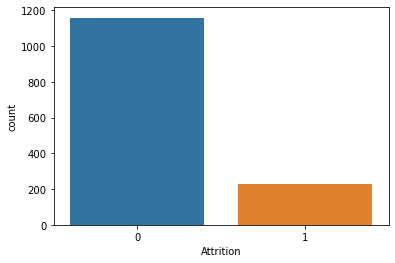

In [239]:
# check the target variable that is fraudulet and not fradulent transactiondata['Class'].value_counts()# 0 -> non fraudulent
# 1 -> fraudulent
# visualize the target variable
g = sns.countplot(df_new['Attrition'])
g.set_xticklabels(['0','1'])
plt.show()

In [240]:
# class count
Attrition_count_0, Attrition_count_1 = df_new['Attrition'].value_counts()

# Separate class
Attrition_0 = df_new[df_new['Attrition'] == 0]
Attrition_1 = df_new[df_new['Attrition'] == 1]# print the shape of the class
print('Attrition 0:', Attrition_0.shape)
print('Attrition 1:', Attrition_1.shape)

Attrition 0: (1158, 29)
Attrition 1: (229, 29)


In [241]:
# Attrition_0_under = Attrition_0.sample(Attrition_count_1)

# y = pd.concat([Attrition_0_under, Attrition_1], axis=0)

# print("total Attrition of 1 and0:",y['Attrition'].value_counts())# plot the count after under-sampeling
# y['Attrition'].value_counts().plot(kind='bar', title='count (target)')

total Attrition of 1 and 0: 0    1158
1    1158
Name: Attrition, dtype: int64


<AxesSubplot:title={'center':'count (target)'}>

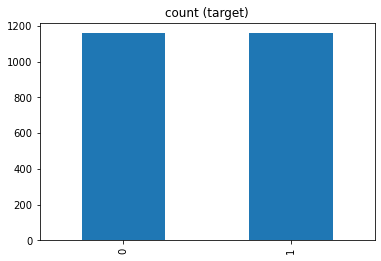

In [242]:
Attrition_1_over = Attrition_1.sample(Attrition_count_0, replace=True)

test_over= pd.concat([Attrition_1_over, Attrition_0], axis=0)

print("total Attrition of 1 and 0:",test_over['Attrition'].value_counts())# plot the count after under-sampeling
test_over['Attrition'].value_counts().plot(kind='bar', title='count (target)')

After applying over sampling we are once again listing the values of our label column to cross verify the updated information. Here we see that we have successfully resolved the class imbalance problem and now all the categories have same data ensuring that the machine learning model does not get biased towards one category.

### Feature Scaling

In [243]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = pd.DataFrame(sc.fit_transform(x), columns=x.columns)
x.head()

,Age,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.536681,0.734325,1.405373,-1.011249,-0.876177,-0.940815,-0.665328,-1.229911,0.376231,0.043309,...,-0.424765,-1.575817,-0.929427,-0.343728,-2.171420,-2.501172,-0.022350,0.040903,-0.710699,0.368270
1,1.442111,-1.307769,-0.496337,-0.145521,-1.853858,-0.940815,0.251978,0.813067,-1.034126,0.043309,...,2.354241,1.199034,0.238250,-0.045106,0.151871,0.336558,0.832812,0.965895,-0.310480,0.982200
2,0.083966,1.406752,-0.496337,-0.887573,-0.876177,1.305159,1.169285,0.813067,-1.034126,-0.941432,...,-0.424765,-0.650866,-0.929427,-0.493039,0.151871,0.336558,-1.305094,-1.192419,-0.710699,-1.166556
3,-0.368749,1.453896,-0.496337,-0.763898,1.079185,-0.940815,1.169285,-1.229911,0.376231,-0.941432,...,-0.424765,0.274084,-0.929427,-0.343728,0.151871,0.336558,0.405231,0.965895,0.489958,-1.166556
4,-1.047821,-0.533609,-0.496337,-0.887573,-1.853858,0.556501,-1.582635,0.813067,0.376231,-0.941432,...,-0.424765,1.199034,0.238250,-0.642351,0.151871,0.336558,-0.877513,-0.575758,0.089739,-0.552626


In [244]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

### FInding the best model for model buidling

In [245]:
max_acc=0
max_RS=0

for i in range(1,250):
    x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train, y_train)
    pred = lr.predict(x_test)
    acc_score = (accuracy_score(y_test, pred))*100
    
    if acc_score>max_acc:
        max_acc=acc_score
        max_RS=i

print("Best accuracy score is", max_acc,"on Random State", max_RS)

Best accuracy score is 91.06628242074927 on Random State 221


## Creating the training and testing data sets

In [246]:
x_train, x_test, y_train,y_test = train_test_split(x,y, test_size=0.25, random_state=221)

### Machine Learning Model for Classification with Evaluation Metrics

In [247]:
# Classification Model Function

def classify(model,x,y):
    x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=221)
    
    # Training the model
    model.fit(x_train,y_train)
    
    # Predicting Y_test
    pred = model.predict(x_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model,x,y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

We defined a class that will perform the train-test split, training of machine learning model, predicting the label value, getting the accuracy score, generating the classification report, getting the cross validation score and the result of difference between the accuracy score and cross validation score for any machine learning model that calls for this function.

In [248]:
# Logistic Regression

model=LogisticRegression()
classify(model,x,y)

Accuracy Score: 91.06628242074927

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.99      0.95       297
           1       0.85      0.46      0.60        50

    accuracy                           0.91       347
   macro avg       0.88      0.72      0.77       347
weighted avg       0.91      0.91      0.90       347

Cross Validation Score: 87.23813728800354

Accuracy Score - Cross Validation Score is 3.828145132745732


In [249]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=221)
classify(model,x,y)

Accuracy Score: 89.04899135446685

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.99      0.94       297
           1       0.88      0.28      0.42        50

    accuracy                           0.89       347
   macro avg       0.88      0.64      0.68       347
weighted avg       0.89      0.89      0.87       347

Cross Validation Score: 86.2306833233774

Accuracy Score - Cross Validation Score is 2.818308031089444


In [250]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=221,max_depth=15)
classify(model,x,y)

Accuracy Score: 81.26801152737752

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.88      0.89       297
           1       0.37      0.42      0.39        50

    accuracy                           0.81       347
   macro avg       0.63      0.65      0.64       347
weighted avg       0.82      0.81      0.82       347

Cross Validation Score: 76.4213178193907

Accuracy Score - Cross Validation Score is 4.84669370798683


In [251]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=221)
classify(model,x,y)

Accuracy Score: 88.76080691642652

Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94       297
           1       0.92      0.24      0.38        50

    accuracy                           0.89       347
   macro avg       0.90      0.62      0.66       347
weighted avg       0.89      0.89      0.86       347

Cross Validation Score: 85.36425733059761

Accuracy Score - Cross Validation Score is 3.3965495858289074


In [255]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model,x,y)

Accuracy Score: 86.45533141210375

Classification Report:
               precision    recall  f1-score   support

           0       0.86      1.00      0.93       297
           1       1.00      0.06      0.11        50

    accuracy                           0.86       347
   macro avg       0.93      0.53      0.52       347
weighted avg       0.88      0.86      0.81       347

Cross Validation Score: 83.99501337558112

Accuracy Score - Cross Validation Score is 2.4603180365226223


In [256]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model,x,y)

Accuracy Score: 89.33717579250721

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94       297
           1       0.72      0.42      0.53        50

    accuracy                           0.89       347
   macro avg       0.82      0.70      0.74       347
weighted avg       0.88      0.89      0.88       347

Cross Validation Score: 86.01355738513881

Accuracy Score - Cross Validation Score is 3.3236184073684


In [257]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model,x,y)

Accuracy Score: 88.18443804034582

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.99      0.94       297
           1       0.85      0.22      0.35        50

    accuracy                           0.88       347
   macro avg       0.86      0.61      0.64       347
weighted avg       0.88      0.88      0.85       347

Cross Validation Score: 85.79721060696569

Accuracy Score - Cross Validation Score is 2.387227433380133


# HyperParameter Tuning:

### Hyper yuning with KNeighbor Classifier

In [259]:
# KNN classifier
parameters = {'n_neighbors':[2,3,4],'weights':['uniform','distance'],'leaf_size':[10,100],'algorithm':['auto','ball_tree','kd_tree','brute']}
GCV=GridSearchCV(KNeighborsClassifier(),parameters,cv=5)

In [260]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [10, 100], 'n_neighbors': [2, 3, 4],
                         'weights': ['uniform', 'distance']})

In [261]:
GCV.best_params_

{'algorithm': 'auto', 'leaf_size': 10, 'n_neighbors': 4, 'weights': 'uniform'}

In [262]:
Final_model=KNeighborsClassifier(algorithm='auto',leaf_size=10, n_neighbors=4, weights='uniform')
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
acc=accuracy_score(y_test, pred)

print(acc*100)

86.1671469740634


## HyperTuning with Random Forest CLassifier

In [263]:
parameters = {'max_depth': [10, 20, 30, 40, None],
              'max_features': ['auto', 'sqrt','log2'],
              'min_samples_leaf': [1, 2, 4],
              'min_samples_split': [2, 5, 10],
              'n_estimators': [50, 100, 150]}
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=3)
GCV.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 20, 30, 40, None],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 150]})

In [264]:
GCV.best_params_

{'max_depth': 30,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 50}

In [265]:
Finalmodel=RandomForestClassifier(max_features= 'sqrt', min_samples_leaf= 1, min_samples_split=10,n_estimators=50,max_depth=30)
Finalmodel.fit(x_train,y_train)
pred=Finalmodel.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc)

0.8818443804034583


## Hyper tuning for Dceision Tree Classifier

In [266]:
# Choosing Decision Tree Classifier

param = {'criterion' : ["gini", "entropy"],'splitter' : ["best", "random"],'min_samples_split' : [2, 3, 4],
              'max_depth' : [4, 6, 8]}
GSCV = GridSearchCV(DecisionTreeClassifier(),param, cv=5)


In [267]:
GSCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8], 'min_samples_split': [2, 3, 4],
                         'splitter': ['best', 'random']})

We have trained the Grid Search CV with the list of parameters I feel it should check for best possible outcomes

In [269]:
GSCV.best_params_


{'criterion': 'gini',
 'max_depth': 4,
 'min_samples_split': 3,
 'splitter': 'random'}

In [270]:
GSCV.best_score_

0.8471153846153845

In [271]:
Final_Mod = DecisionTreeClassifier(criterion="gini", max_depth=4, min_samples_split=3, splitter="random")
Final_Mod.fit(x_train, y_train)
CV_pred = Final_Mod.predict(x_test)
CV_acc = (accuracy_score(y_test,CV_pred ))*100
print("Accuracy score for the Best Model is:", CV_acc)

Accuracy score for the Best Model is: 85.30259365994236


### Out of 3, Random Forest Classifier perform as Best model
I have successfully incorporated the Hyper Parameter Tuning on my Final Model and received the accuracy score for it.

In [272]:
# Saving the model using .pkl
import joblib
joblib.dump(CV_acc,"HR_Analytic_project.pkl")

['HR_Analytic_project.pkl']